## Sleep Dataset Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

In [3]:
# Load the dataset
df = pd.read_csv('dataset_2191_sleep.csv')

In [20]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (62, 8)

Column Names:
['body_weight', 'brain_weight', 'max_life_span', 'gestation_time', 'predation_index', 'sleep_exposure_index', 'danger_index', 'total_sleep']

First 5 rows:


,body_weight,brain_weight,max_life_span,gestation_time,predation_index,sleep_exposure_index,danger_index,total_sleep
0,6654.000,5712.0,38.6,645.0,3,5,3,3.3
1,1.000,6.6,4.5,42.0,3,1,3,8.3
2,3.385,44.5,14.0,60.0,1,1,1,12.5
3,0.920,5.7,NaN,25.0,5,2,3,16.5
4,2547.000,4603.0,69.0,624.0,3,5,4,3.9


In [6]:
# Data Overview and Summary Statistics
print("=== DATASET OVERVIEW ===")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\n=== DATA TYPES ===")
print(df.dtypes)
print("\n=== MISSING VALUES ===")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

=== DATASET OVERVIEW ===
Number of rows: 62
Number of columns: 8

=== DATA TYPES ===
body_weight             float64
brain_weight            float64
max_life_span            object
gestation_time           object
predation_index           int64
sleep_exposure_index      int64
danger_index              int64
total_sleep              object
dtype: object

=== MISSING VALUES ===
body_weight             0
brain_weight            0
max_life_span           0
gestation_time          0
predation_index         0
sleep_exposure_index    0
danger_index            0
total_sleep             0
dtype: int64

Total missing values: 0


In [8]:
# Handle missing values (represented as '?' in the dataset)
print("=== HANDLING MISSING VALUES ===")
# Replace '?' with NaN
df = df.replace('?', np.nan)

# Convert columns to appropriate data types
numeric_columns = df.columns.tolist()
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Missing values after conversion:")
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0])

=== HANDLING MISSING VALUES ===
Missing values after conversion:
max_life_span     4
gestation_time    4
total_sleep       4
dtype: int64


In [9]:
# Descriptive Statistics
print("=== DESCRIPTIVE STATISTICS ===")
desc_stats = df.describe()
print(desc_stats.round(2))

=== DESCRIPTIVE STATISTICS ===
       body_weight  brain_weight  max_life_span  gestation_time  \
count        62.00         62.00          58.00           58.00   
mean        198.79        283.13          19.88          142.35   
std         899.16        930.28          18.21          146.81   
min           0.00          0.14           2.00           12.00   
25%           0.60          4.25           6.62           35.75   
50%           3.34         17.25          15.10           79.00   
75%          48.20        166.00          27.75          207.50   
max        6654.00       5712.00         100.00          645.00   

       predation_index  sleep_exposure_index  danger_index  total_sleep  
count            62.00                 62.00         62.00        58.00  
mean              2.87                  2.42          2.61        10.53  
std               1.48                  1.60          1.44         4.61  
min               1.00                  1.00          1.00         2.

In [10]:
# Data Cleaning and Preparation
print("=== DATA CLEANING ===")

# Create a cleaned dataset for analysis (removing rows with missing total_sleep)
df_clean = df.dropna(subset=['total_sleep']).copy()
print(f"Original dataset: {len(df)} rows")
print(f"After removing missing sleep data: {len(df_clean)} rows")

# Fill missing values for other columns with median (for numerical analysis)
df_filled = df_clean.copy()
for col in df_filled.columns:
    if df_filled[col].isnull().sum() > 0:
        median_val = df_filled[col].median()
        df_filled[col].fillna(median_val, inplace=True)
        print(f"Filled {col} missing values with median: {median_val:.2f}")

=== DATA CLEANING ===
Original dataset: 62 rows
After removing missing sleep data: 58 rows
Filled max_life_span missing values with median: 13.85
Filled gestation_time missing values with median: 79.00


In [11]:
# Create log-transformed versions of highly skewed variables
df_analysis = df_filled.copy()
df_analysis['log_body_weight'] = np.log10(df_analysis['body_weight'] + 1)
df_analysis['log_brain_weight'] = np.log10(df_analysis['brain_weight'] + 1)

print("=== LOG TRANSFORMATIONS APPLIED ===")
print("Added log_body_weight and log_brain_weight columns")

=== LOG TRANSFORMATIONS APPLIED ===
Added log_body_weight and log_brain_weight columns


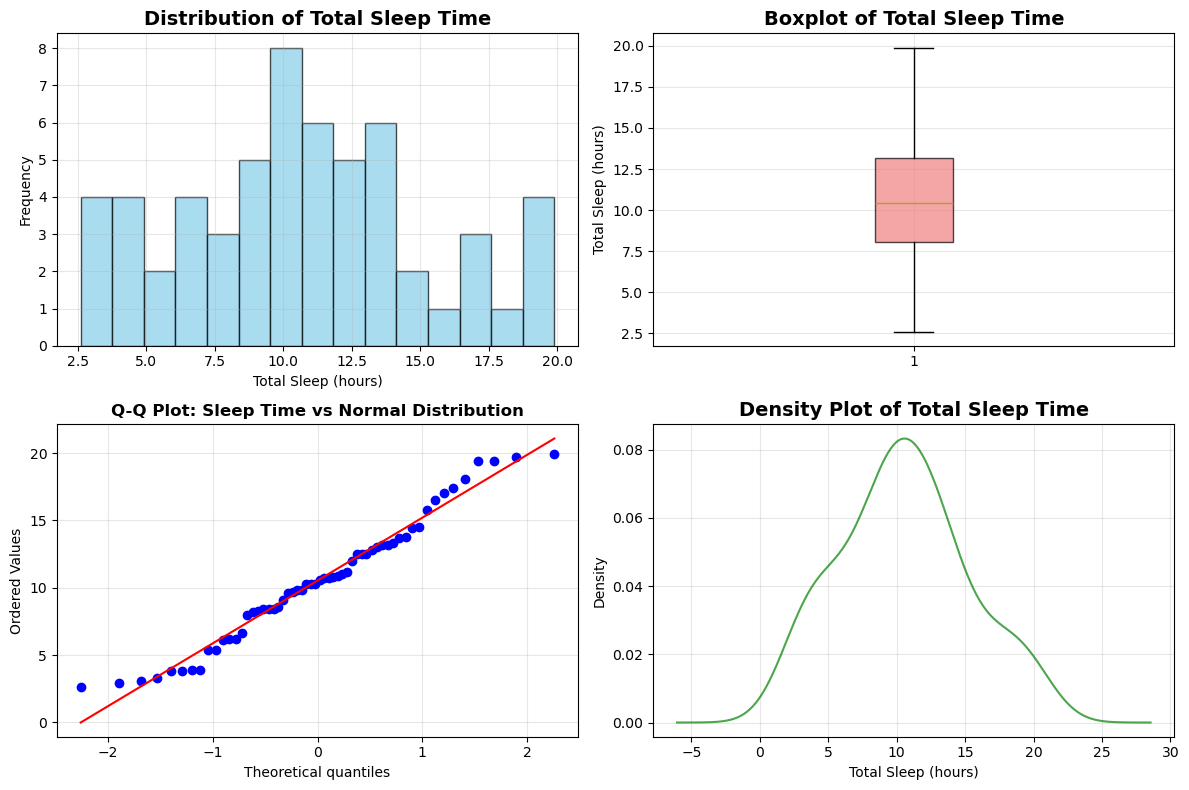

In [12]:
# === VISUALIZATION 1: Distribution of Sleep Time ===
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(df_clean['total_sleep'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Sleep Time', fontsize=14, fontweight='bold')
plt.xlabel('Total Sleep (hours)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.boxplot(df_clean['total_sleep'], vert=True, patch_artist=True, 
            boxprops=dict(facecolor='lightcoral', alpha=0.7))
plt.title('Boxplot of Total Sleep Time', fontsize=14, fontweight='bold')
plt.ylabel('Total Sleep (hours)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
# Q-Q plot
stats.probplot(df_clean['total_sleep'], dist="norm", plot=plt)
plt.title('Q-Q Plot: Sleep Time vs Normal Distribution', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
# Density plot
df_clean['total_sleep'].plot(kind='density', alpha=0.7, color='green')
plt.title('Density Plot of Total Sleep Time', fontsize=14, fontweight='bold')
plt.xlabel('Total Sleep (hours)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

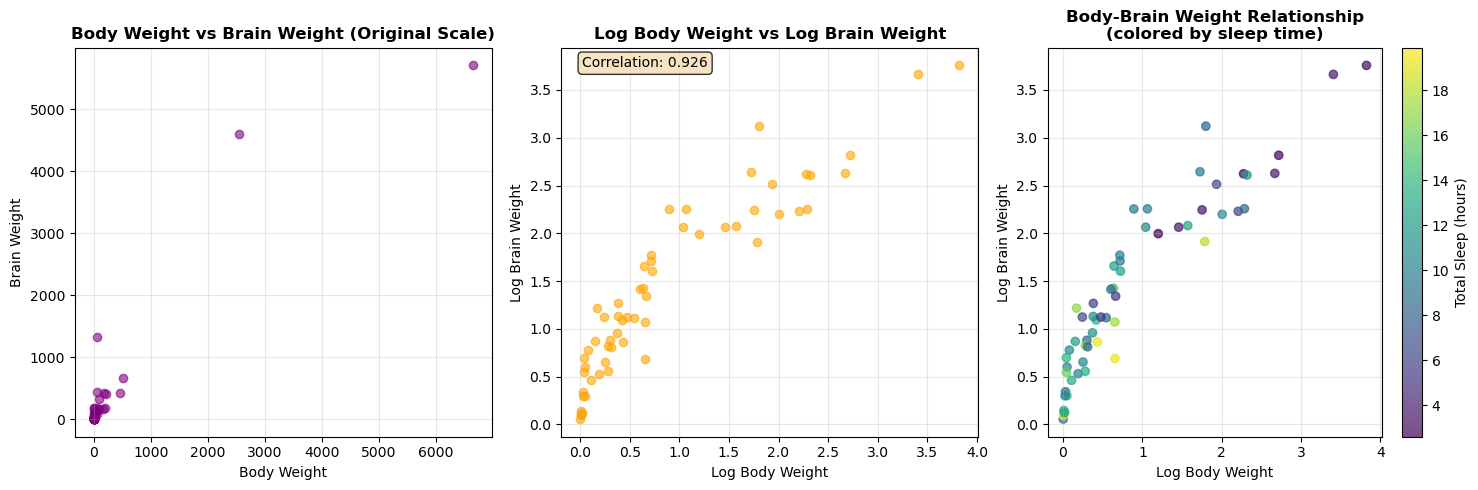

In [13]:
# === VISUALIZATION 2: Body Weight vs Brain Weight Relationship ===
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df_analysis['body_weight'], df_analysis['brain_weight'], alpha=0.6, color='purple')
plt.title('Body Weight vs Brain Weight (Original Scale)', fontsize=12, fontweight='bold')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.scatter(df_analysis['log_body_weight'], df_analysis['log_brain_weight'], alpha=0.6, color='orange')
plt.title('Log Body Weight vs Log Brain Weight', fontsize=12, fontweight='bold')
plt.xlabel('Log Body Weight')
plt.ylabel('Log Brain Weight')
plt.grid(True, alpha=0.3)

# Add correlation coefficient
corr_coef = df_analysis['log_body_weight'].corr(df_analysis['log_brain_weight'])
plt.text(0.05, 0.95, f'Correlation: {corr_coef:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

plt.subplot(1, 3, 3)
# Scatter plot with sleep time as color
scatter = plt.scatter(df_analysis['log_body_weight'], df_analysis['log_brain_weight'], 
                     c=df_analysis['total_sleep'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Total Sleep (hours)')
plt.title('Body-Brain Weight Relationship\n(colored by sleep time)', fontsize=12, fontweight='bold')
plt.xlabel('Log Body Weight')
plt.ylabel('Log Brain Weight')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

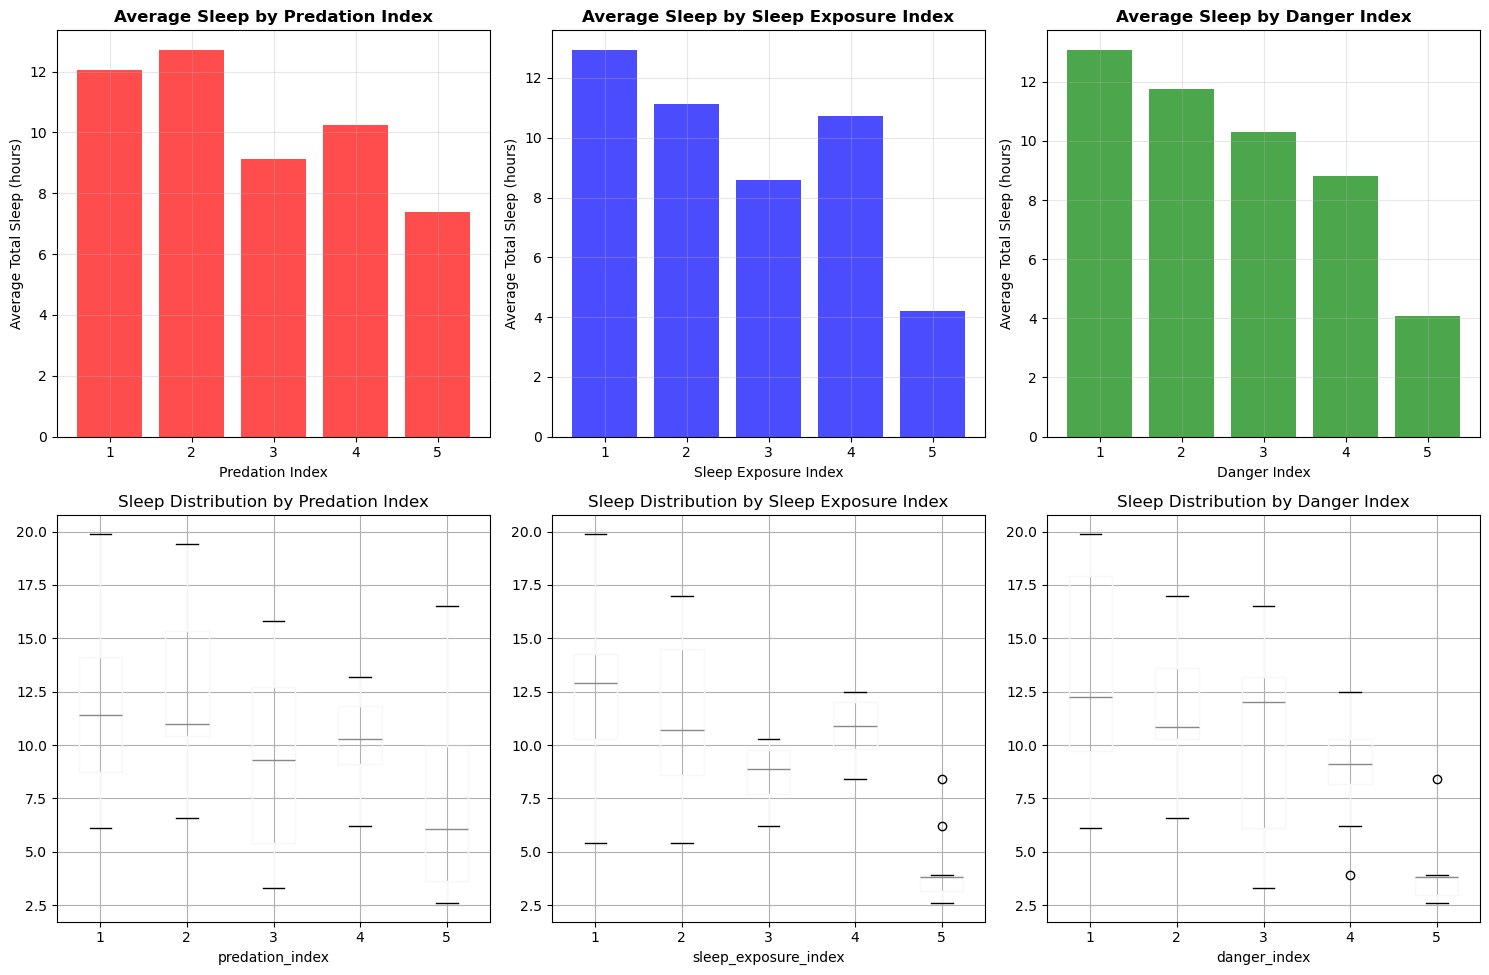

In [14]:
# === VISUALIZATION 3: Sleep vs Risk Factors ===
plt.figure(figsize=(15, 10))

# Sleep vs Predation Index
plt.subplot(2, 3, 1)
predation_sleep = df_analysis.groupby('predation_index')['total_sleep'].mean()
plt.bar(predation_sleep.index, predation_sleep.values, alpha=0.7, color='red')
plt.title('Average Sleep by Predation Index', fontsize=12, fontweight='bold')
plt.xlabel('Predation Index')
plt.ylabel('Average Total Sleep (hours)')
plt.grid(True, alpha=0.3)

# Sleep vs Sleep Exposure Index
plt.subplot(2, 3, 2)
exposure_sleep = df_analysis.groupby('sleep_exposure_index')['total_sleep'].mean()
plt.bar(exposure_sleep.index, exposure_sleep.values, alpha=0.7, color='blue')
plt.title('Average Sleep by Sleep Exposure Index', fontsize=12, fontweight='bold')
plt.xlabel('Sleep Exposure Index')
plt.ylabel('Average Total Sleep (hours)')
plt.grid(True, alpha=0.3)

# Sleep vs Danger Index
plt.subplot(2, 3, 3)
danger_sleep = df_analysis.groupby('danger_index')['total_sleep'].mean()
plt.bar(danger_sleep.index, danger_sleep.values, alpha=0.7, color='green')
plt.title('Average Sleep by Danger Index', fontsize=12, fontweight='bold')
plt.xlabel('Danger Index')
plt.ylabel('Average Total Sleep (hours)')
plt.grid(True, alpha=0.3)

# Box plots for better distribution view
plt.subplot(2, 3, 4)
df_analysis.boxplot(column='total_sleep', by='predation_index', ax=plt.gca())
plt.title('Sleep Distribution by Predation Index')
plt.suptitle('')  # Remove automatic title

plt.subplot(2, 3, 5)
df_analysis.boxplot(column='total_sleep', by='sleep_exposure_index', ax=plt.gca())
plt.title('Sleep Distribution by Sleep Exposure Index')
plt.suptitle('')

plt.subplot(2, 3, 6)
df_analysis.boxplot(column='total_sleep', by='danger_index', ax=plt.gca())
plt.title('Sleep Distribution by Danger Index')
plt.suptitle('')

plt.tight_layout()
plt.show()

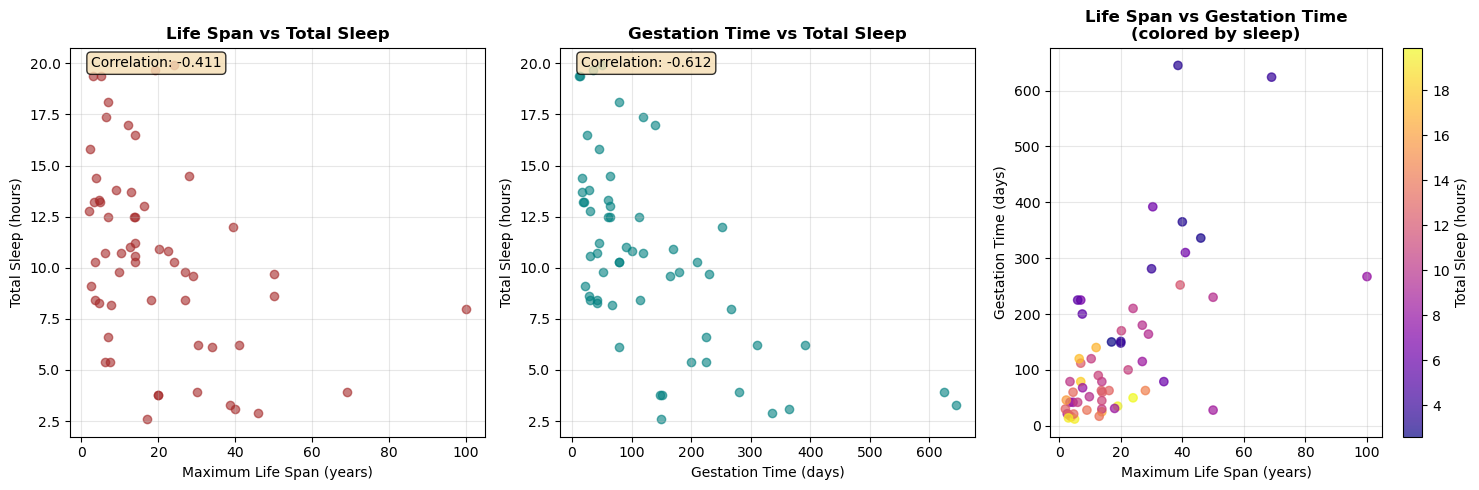

In [15]:
# === VISUALIZATION 4: Life Span and Gestation Relationships ===
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df_analysis['max_life_span'], df_analysis['total_sleep'], alpha=0.6, color='brown')
plt.title('Life Span vs Total Sleep', fontsize=12, fontweight='bold')
plt.xlabel('Maximum Life Span (years)')
plt.ylabel('Total Sleep (hours)')
plt.grid(True, alpha=0.3)

# Add correlation
corr = df_analysis['max_life_span'].corr(df_analysis['total_sleep'])
plt.text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

plt.subplot(1, 3, 2)
plt.scatter(df_analysis['gestation_time'], df_analysis['total_sleep'], alpha=0.6, color='teal')
plt.title('Gestation Time vs Total Sleep', fontsize=12, fontweight='bold')
plt.xlabel('Gestation Time (days)')
plt.ylabel('Total Sleep (hours)')
plt.grid(True, alpha=0.3)

corr = df_analysis['gestation_time'].corr(df_analysis['total_sleep'])
plt.text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

plt.subplot(1, 3, 3)
plt.scatter(df_analysis['max_life_span'], df_analysis['gestation_time'], 
           c=df_analysis['total_sleep'], cmap='plasma', alpha=0.7)
plt.colorbar(label='Total Sleep (hours)')
plt.title('Life Span vs Gestation Time\n(colored by sleep)', fontsize=12, fontweight='bold')
plt.xlabel('Maximum Life Span (years)')
plt.ylabel('Gestation Time (days)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

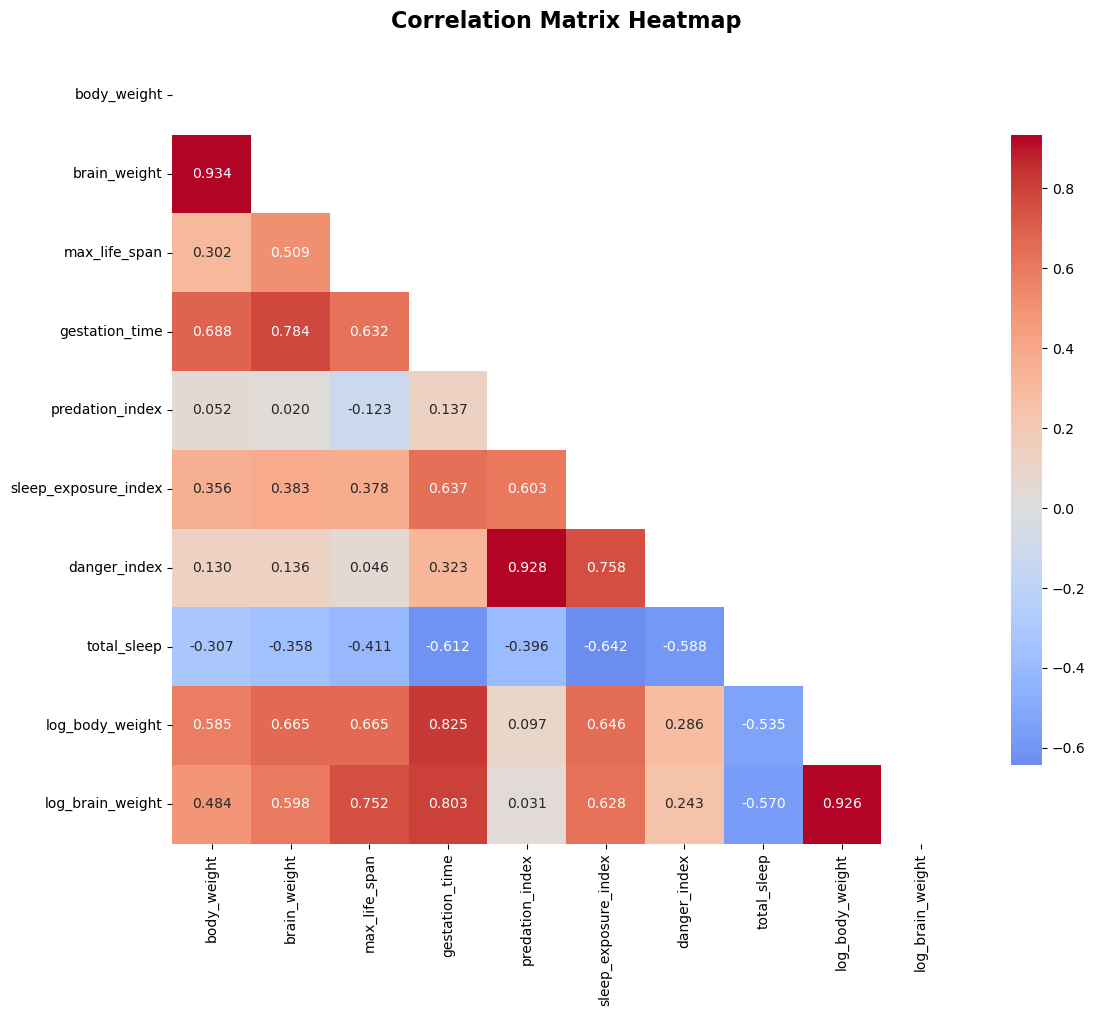

In [16]:
# === VISUALIZATION 5: Correlation Heatmap ===
plt.figure(figsize=(12, 10))

# Calculate correlation matrix
correlation_matrix = df_analysis.corr()

# Create heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8}, mask=mask)
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

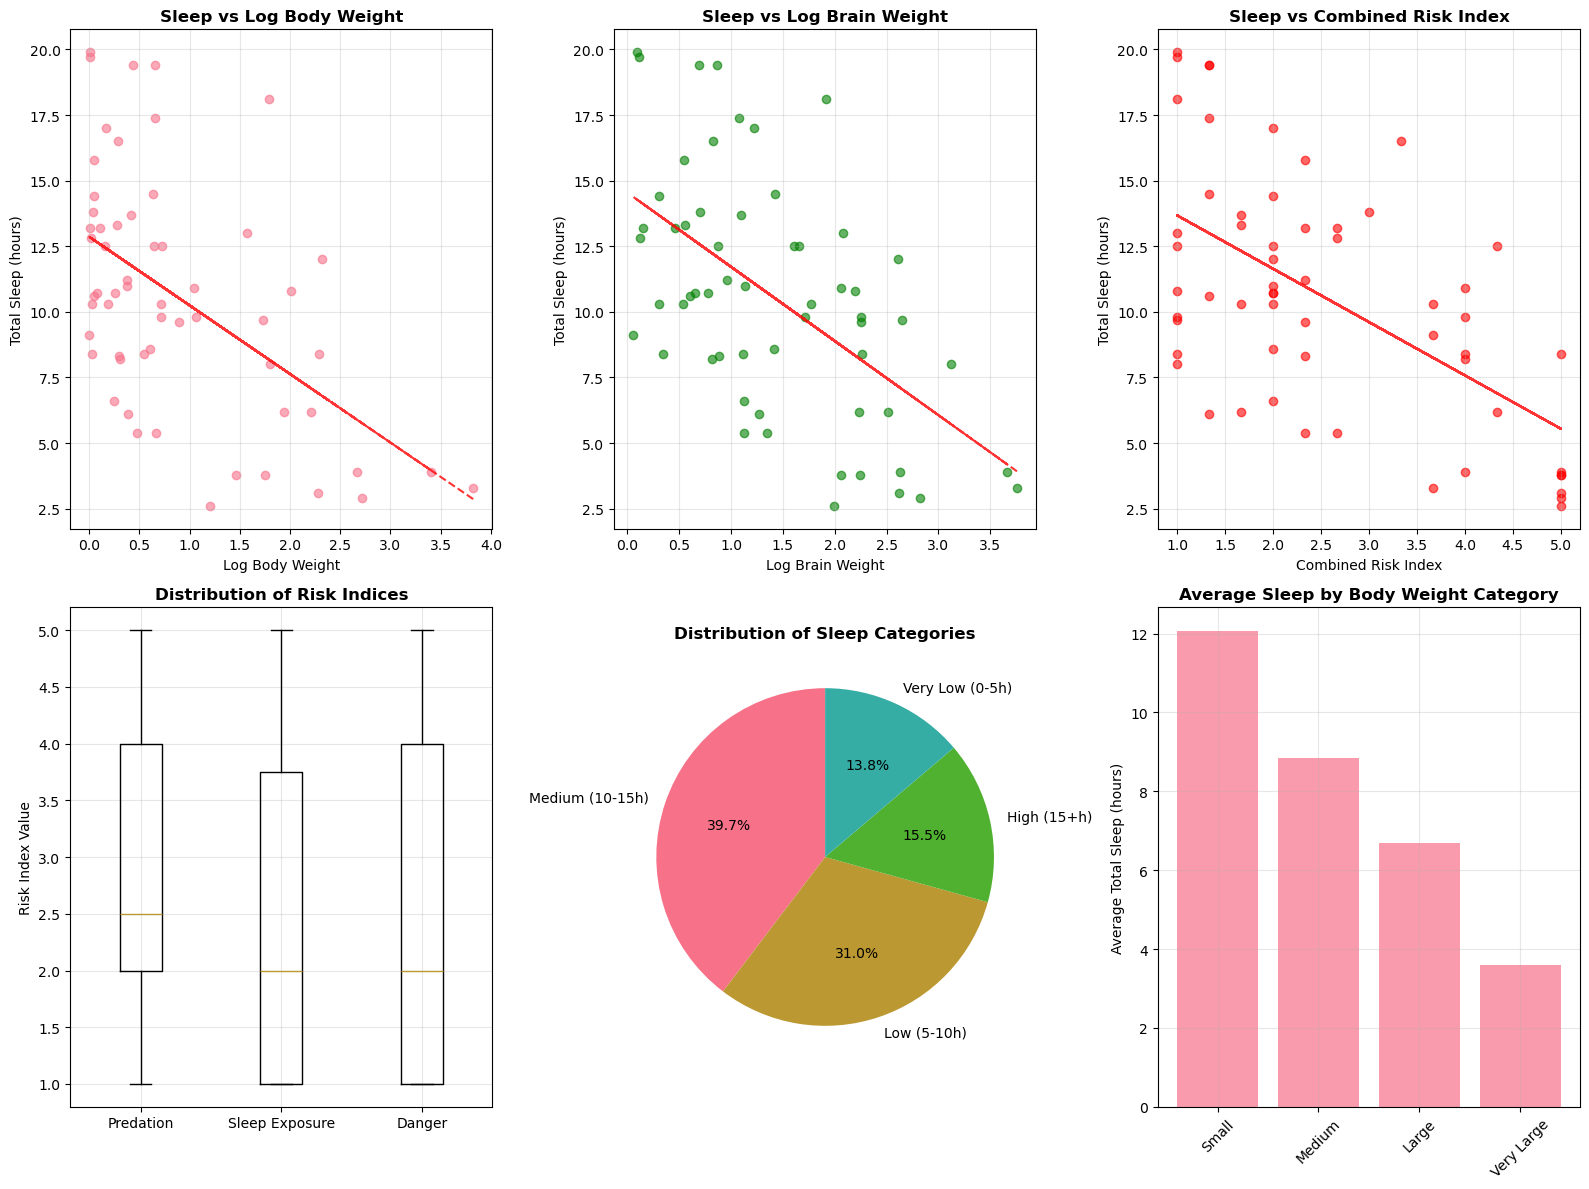

In [17]:
# === VISUALIZATION 6: Advanced Analysis - Multiple Relationships ===
plt.figure(figsize=(16, 12))

# Create a 2x3 subplot layout
plt.subplot(2, 3, 1)
# Sleep vs Log Body Weight
plt.scatter(df_analysis['log_body_weight'], df_analysis['total_sleep'], alpha=0.6)
z = np.polyfit(df_analysis['log_body_weight'], df_analysis['total_sleep'], 1)
p = np.poly1d(z)
plt.plot(df_analysis['log_body_weight'], p(df_analysis['log_body_weight']), "r--", alpha=0.8)
plt.title('Sleep vs Log Body Weight', fontweight='bold')
plt.xlabel('Log Body Weight')
plt.ylabel('Total Sleep (hours)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
# Sleep vs Log Brain Weight
plt.scatter(df_analysis['log_brain_weight'], df_analysis['total_sleep'], alpha=0.6, color='green')
z = np.polyfit(df_analysis['log_brain_weight'], df_analysis['total_sleep'], 1)
p = np.poly1d(z)
plt.plot(df_analysis['log_brain_weight'], p(df_analysis['log_brain_weight']), "r--", alpha=0.8)
plt.title('Sleep vs Log Brain Weight', fontweight='bold')
plt.xlabel('Log Brain Weight')
plt.ylabel('Total Sleep (hours)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 3)
# Risk factors combined
df_analysis['combined_risk'] = (df_analysis['predation_index'] + 
                               df_analysis['sleep_exposure_index'] + 
                               df_analysis['danger_index']) / 3
plt.scatter(df_analysis['combined_risk'], df_analysis['total_sleep'], alpha=0.6, color='red')
z = np.polyfit(df_analysis['combined_risk'], df_analysis['total_sleep'], 1)
p = np.poly1d(z)
plt.plot(df_analysis['combined_risk'], p(df_analysis['combined_risk']), "r--", alpha=0.8)
plt.title('Sleep vs Combined Risk Index', fontweight='bold')
plt.xlabel('Combined Risk Index')
plt.ylabel('Total Sleep (hours)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 4)
# Distribution of risk indices
risk_data = [df_analysis['predation_index'], df_analysis['sleep_exposure_index'], df_analysis['danger_index']]
plt.boxplot(risk_data, labels=['Predation', 'Sleep Exposure', 'Danger'])
plt.title('Distribution of Risk Indices', fontweight='bold')
plt.ylabel('Risk Index Value')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 5)
# Sleep categories
df_analysis['sleep_category'] = pd.cut(df_analysis['total_sleep'], 
                                      bins=[0, 5, 10, 15, 25], 
                                      labels=['Very Low (0-5h)', 'Low (5-10h)', 'Medium (10-15h)', 'High (15+h)'])
sleep_cat_counts = df_analysis['sleep_category'].value_counts()
plt.pie(sleep_cat_counts.values, labels=sleep_cat_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sleep Categories', fontweight='bold')

plt.subplot(2, 3, 6)
# Body weight categories vs sleep
df_analysis['weight_category'] = pd.cut(df_analysis['log_body_weight'], 
                                       bins=4, labels=['Small', 'Medium', 'Large', 'Very Large'])
weight_sleep = df_analysis.groupby('weight_category')['total_sleep'].mean()
plt.bar(range(len(weight_sleep)), weight_sleep.values, alpha=0.7)
plt.xticks(range(len(weight_sleep)), weight_sleep.index, rotation=45)
plt.title('Average Sleep by Body Weight Category', fontweight='bold')
plt.ylabel('Average Total Sleep (hours)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [2]:
# ## Summary
# 
# This analysis of the sleep dataset reveals several interesting patterns:
# 
# ### Key Findings:
# 1. **Sleep-Risk Relationship**: Animals with higher danger indices tend to sleep less, suggesting an evolutionary trade-off between sleep and survival.
# 2. **Body Size Effects**: There are complex relationships between body size, brain size, and sleep patterns.
# 3. **Life History Trade-offs**: Life span and gestation time show varying correlations with sleep duration.
# 4. **Data Distribution**: Sleep times vary widely across species, from about 3 to 20 hours per day.
# 
# ### Methodology:
# - Data cleaning included handling missing values and log transformations for skewed variables
# - Multiple visualization techniques were used to explore relationships
# - Statistical correlations were calculated to quantify relationships
# - Risk indices were combined to create composite measures
# 
# ### Future Analysis:
# - Species classification could provide additional insights
# - Machine learning models could predict sleep patterns based on ecological factors
# - Phylogenetic analysis could account for evolutionary relationships

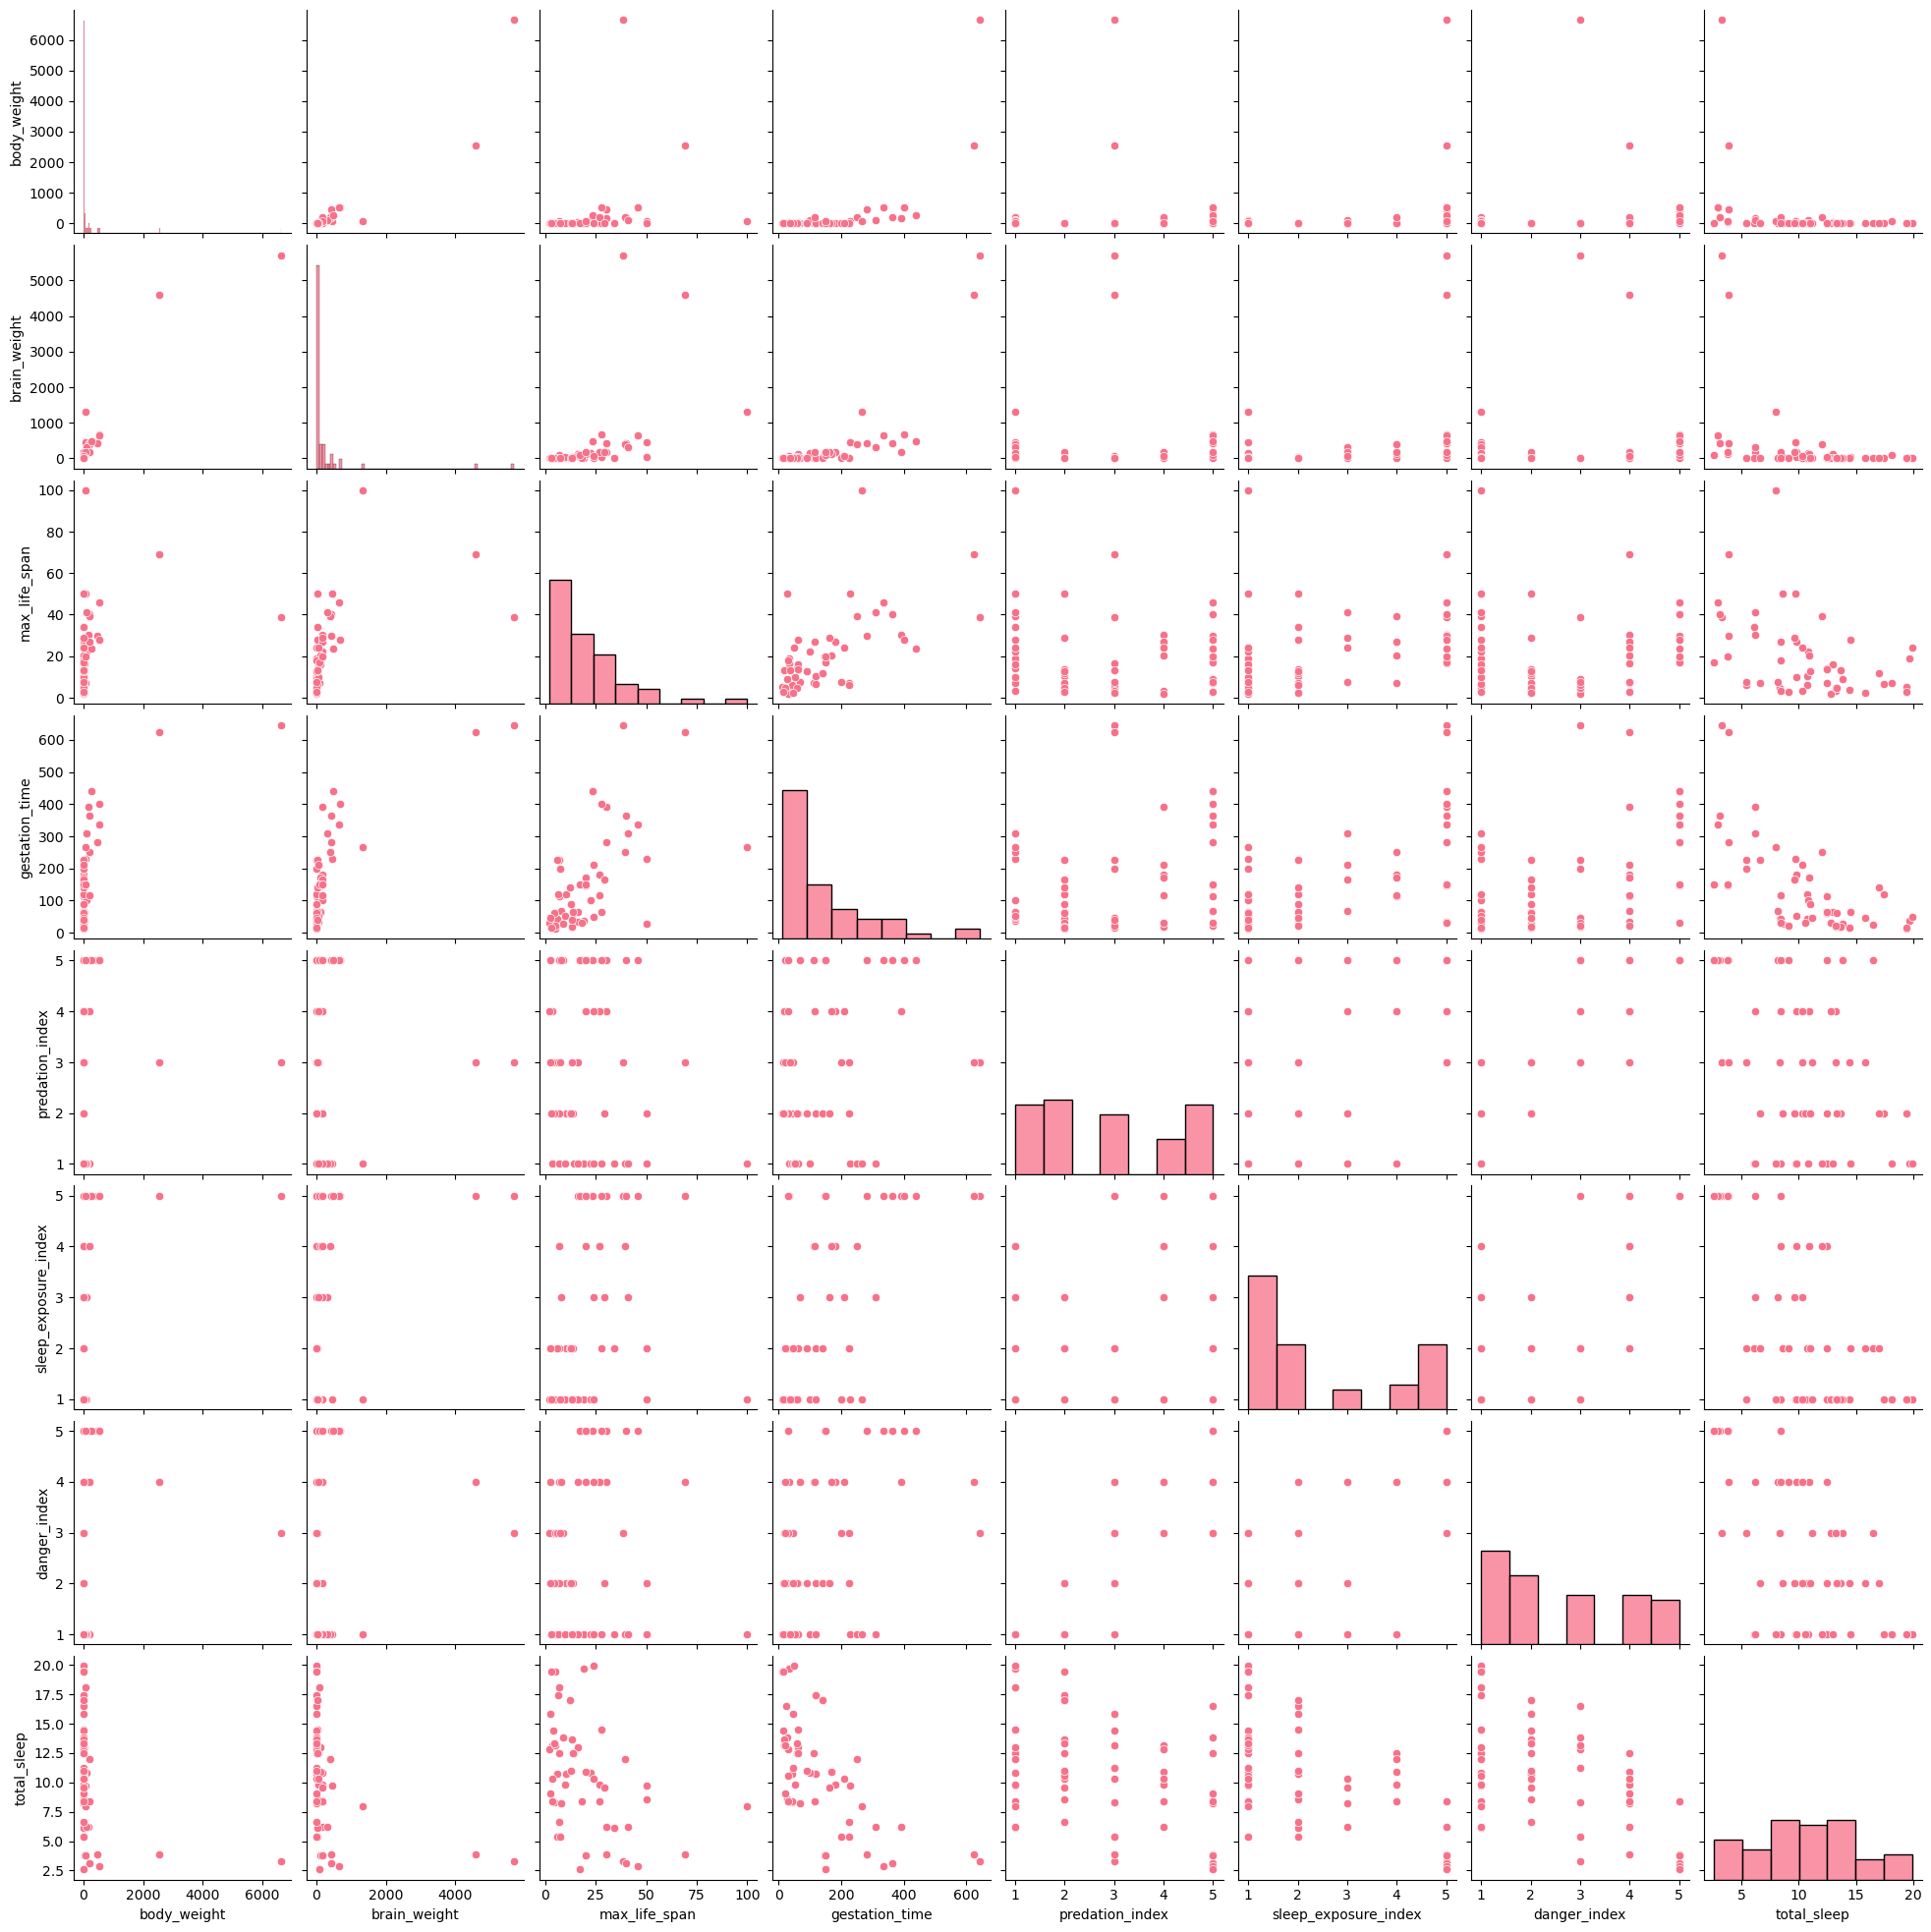

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)   
plt.show()

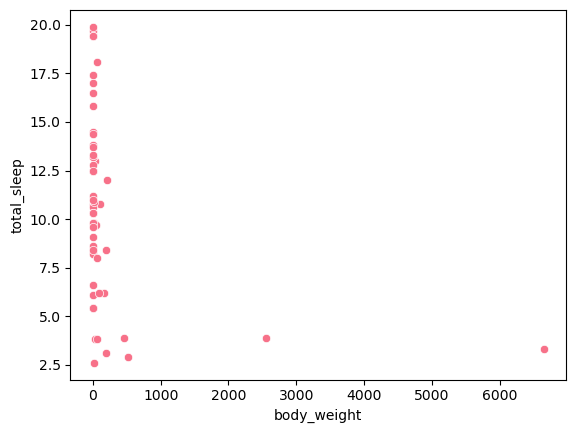

In [22]:
sns.scatterplot(data=df, x="body_weight", y="total_sleep")
plt.show()